# 1. Introduction 👋

<center><img src="https://images.unsplash.com/photo-1553729459-efe14ef6055d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2070&q=80" alt="Loan Picture" width="600" height="600"></center><br>

## Data Set Problems 🤔

👉 The company seeks **to automate (in real time) the loan qualifying procedure** based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict loan approval

👨‍💻 **The machine learning models used in this project are:** 
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost

---

## Data Set Description 🧾
👉 There are **13 variables** in this data set:
*   **8 categorical** variables,
*   **4 continuous** variables, and
*   **1** variable to accommodate the loan ID.

<br>

👉 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*

# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [1]:
!pip install missingno imblearn xgboost


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used.

In [3]:
df = pd.read_csv("../dataset/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.shape)

(614, 13)


👉 As can be seen, the **13 columns** are readable. It also can be seen that there are **614 observations** in the data set.

# 4. Data Exploration 🔍
👉 This section will perform data exploration of "raw" data set that has been imported.

## 4.1 Categorical Variable 📊
👉 The first type of variable that I will explore is categorical variable.

### 4.1.1 Loan ID

In [5]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001020    1
LP001024    1
LP001027    1
LP001028    1
LP001029    1
Name: count, Length: 614, dtype: int64

👉 It can be seen that there are 614 unique ID in the dataset.

### 4.1.2 Gender

In [6]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

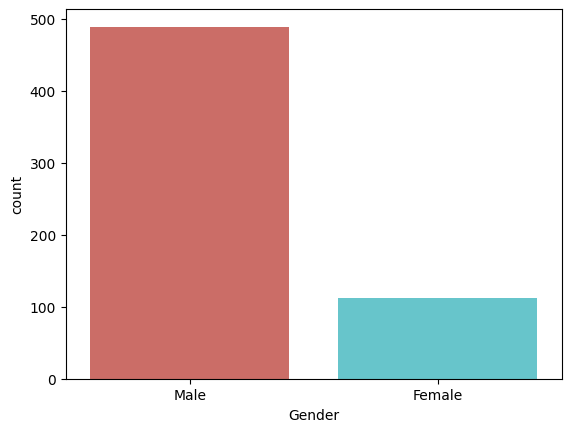

In [7]:
sns.countplot(x="Gender", data=df, palette="hls", hue="Gender", legend=False)
plt.show()

In [8]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


👉 From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

### 4.1.3 Married

In [9]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

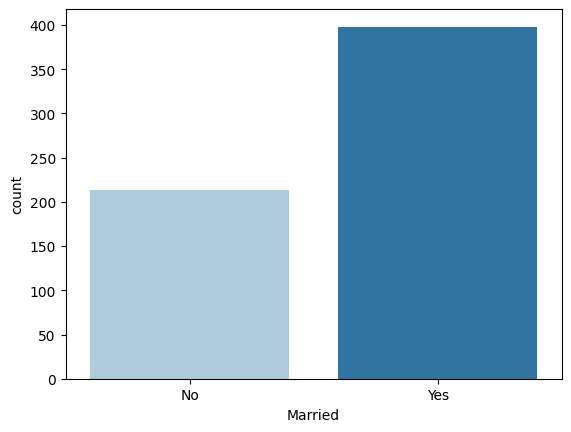

In [10]:
sns.countplot(x="Married", data=df, palette="Paired", hue="Married", legend=False)
plt.show()

👉 The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

In [11]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


### 4.1.4 Education

In [12]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

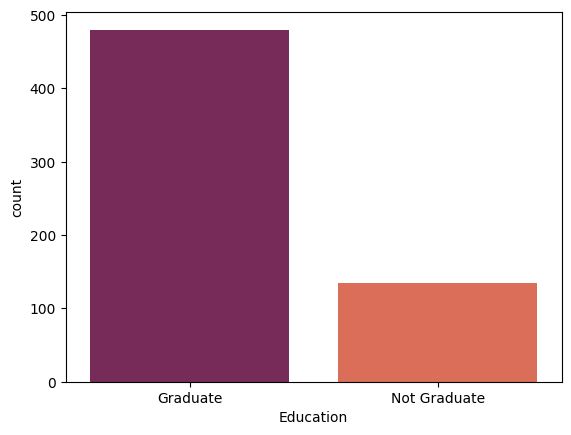

In [13]:
sns.countplot(x="Education", data=df, palette="rocket", hue="Education", legend=False)
plt.show()

In [14]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


👉 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### 4.1.5 Self Employed

In [15]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

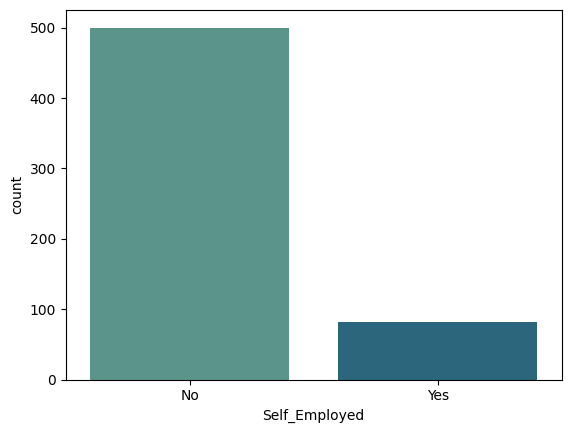

In [16]:
sns.countplot(x="Self_Employed", data=df, palette="crest", hue="Self_Employed", legend=False) 
plt.show()

In [17]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


👉 The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### 4.1.6 Credit History

In [18]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

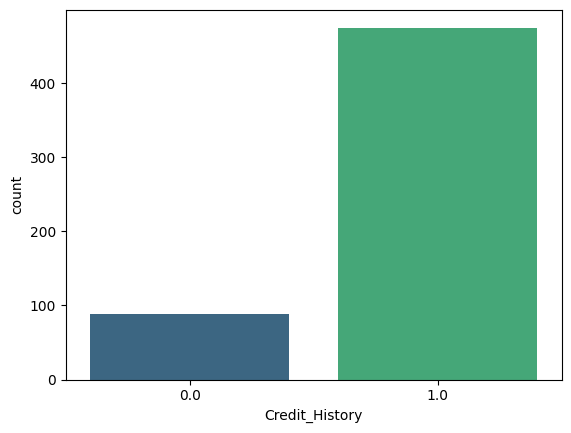

In [19]:
sns.countplot(x="Credit_History", data=df, palette="viridis", hue="Credit_History", legend=False)
plt.show()

In [20]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### 4.1.7 Property Area

In [21]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

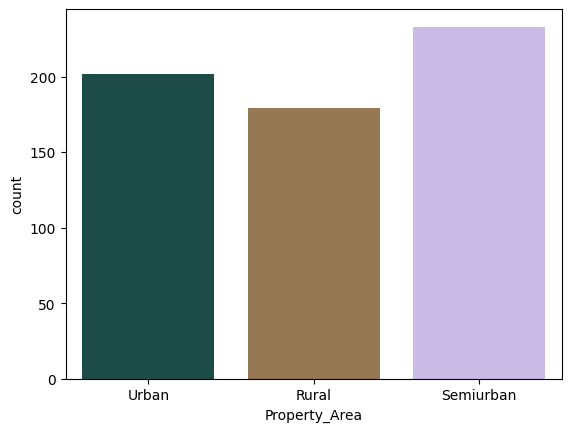

In [22]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix", hue="Property_Area", legend=False)
plt.show()

In [23]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


👉 This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

### 4.1.8 Loan Status

In [24]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

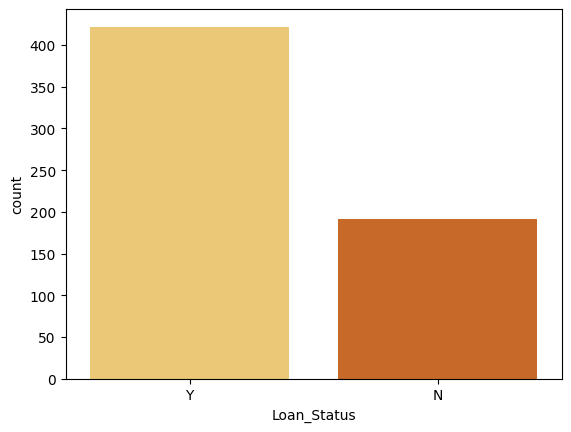

In [25]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr", hue="Loan_Status", legend=False)
plt.show()

In [26]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


👉 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### 4.1.9 Loan Amount Term

In [27]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

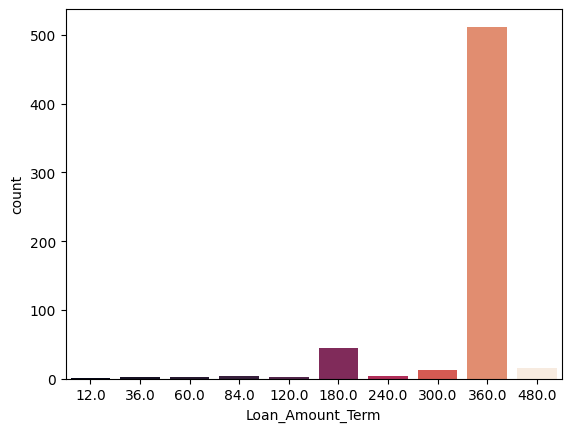

In [28]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket", hue="Loan_Amount_Term", legend=False)
plt.show()

In [29]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


👉 As can be seen from the results, **the 360 days loan duration is the most popular** compared to others.

## 4.2 Numerical Variable 🔢
👉 The second variable that I will explore is categorical variable.

### 4.2.1 Describe Numerical Variable 🔎
👉 This section will show mean, count, std, min, max and others using describe function.


In [30]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### 4.2.2 Distribution of Numerical Variable 📈
👉 In this section, I will show the distribution of numerical variable using histogram and violin plot.

#### 4.2.2.1 Histogram Distribution 📉

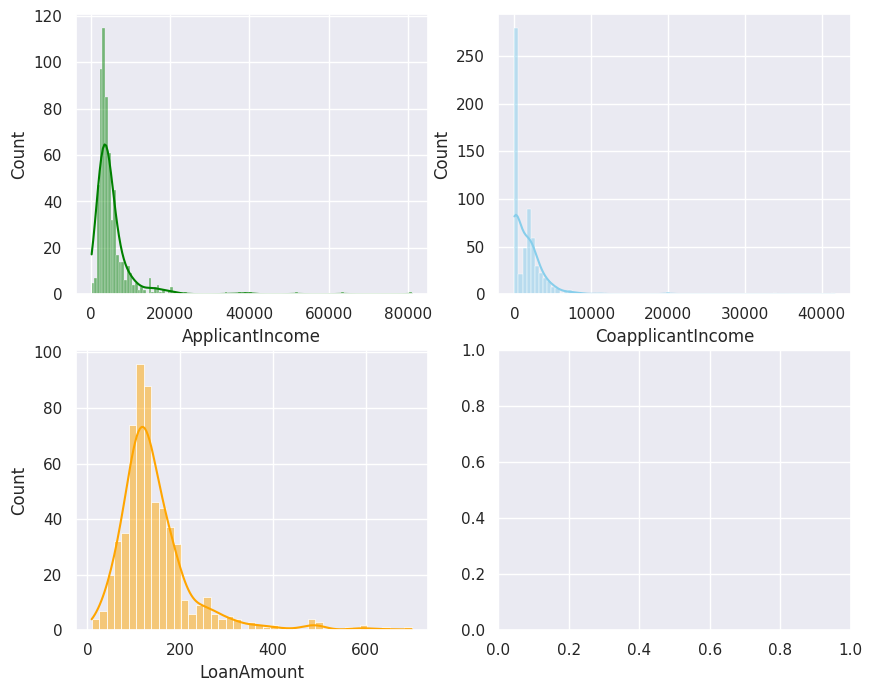

In [31]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

#### 4.2.2.2 Violin Plot 🎻

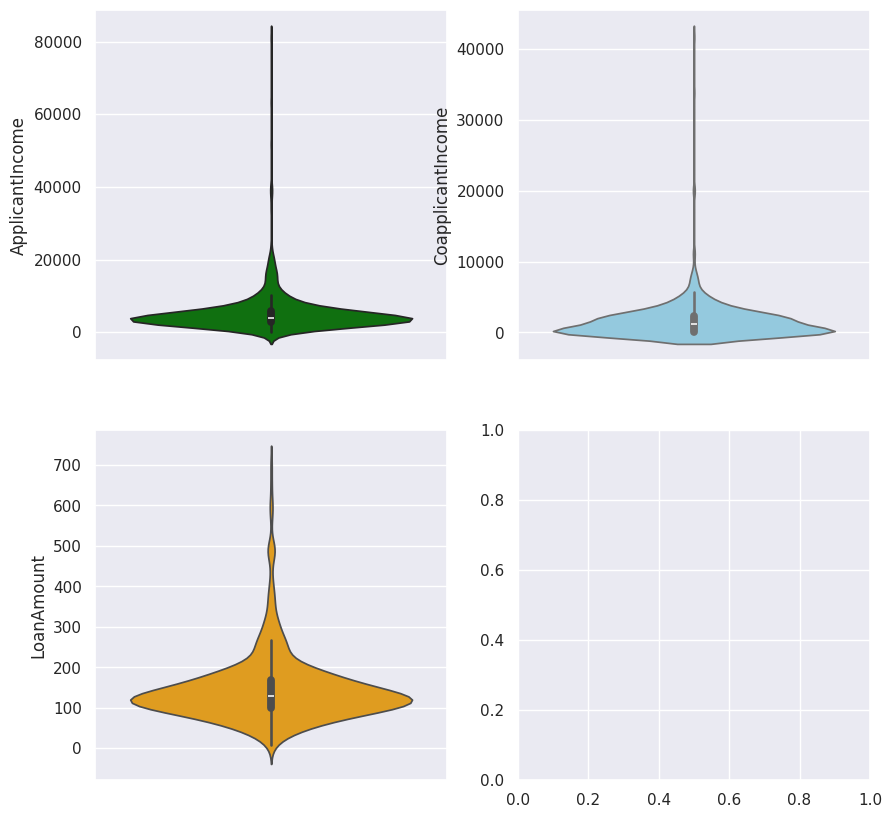

In [32]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

*   The distribution of **Applicant income, Co Applicant Income, and Loan Amount** are **positively skewed** and **it has outliers** (can be seen from both histogram and violin plot).
*   The distribution of **Loan Amount Term** is **negativly skewed** and **it has outliers.**



## 4.3 Other Exploration 💹
👉 This section will show additional exploration from each variables. The additional exploration are:
*   Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
*   Heatmap



### 4.3.1 Heatmap 🔥

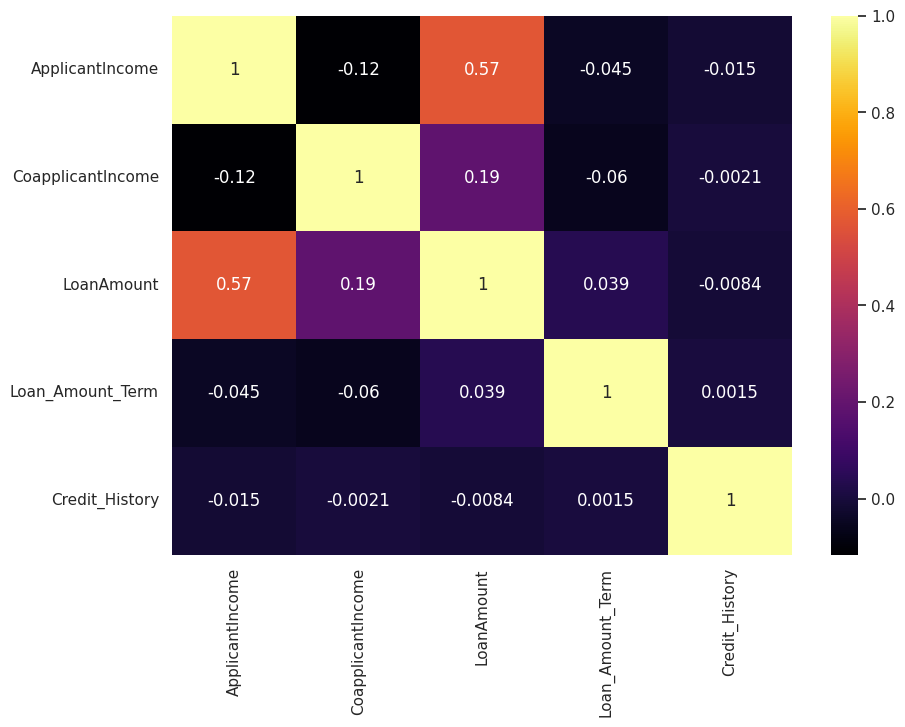

In [33]:
# Remove non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno')
plt.show()

👉 There is positive correlation between Loan Amount and Applicant Income

### 4.3.2 Categorical 📊 - Categorical 📊

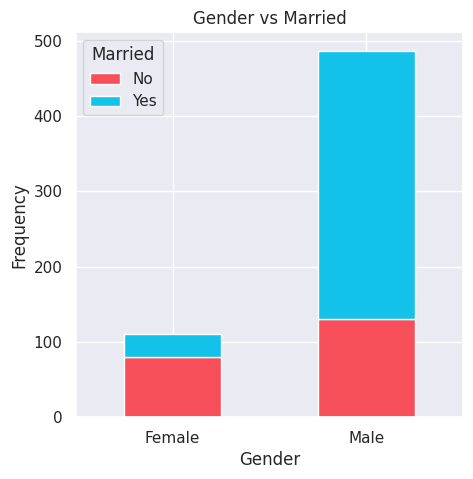

In [34]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

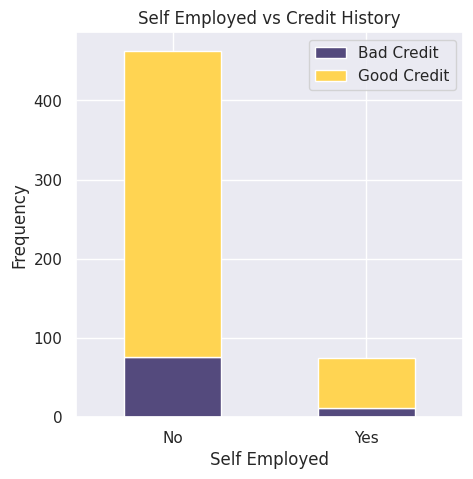

In [35]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

👉 Most not self employed applicants have good credit compared to self employed applicants.

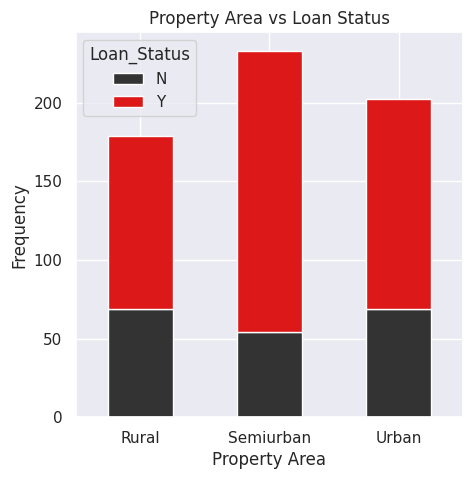

In [36]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

### 4.3.3 Categorical 📊- Numerical 📈

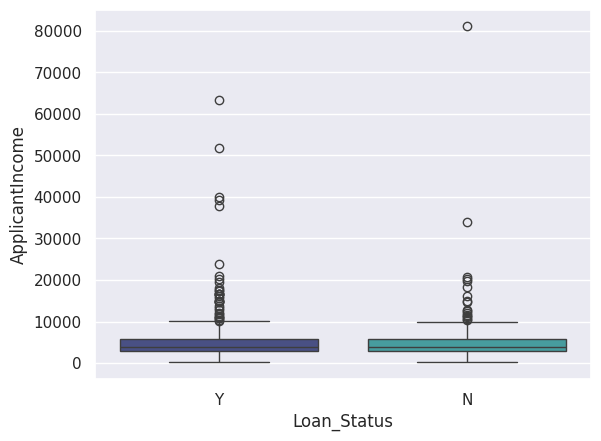

In [37]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako", hue="Loan_Status",legend=False);

👉 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

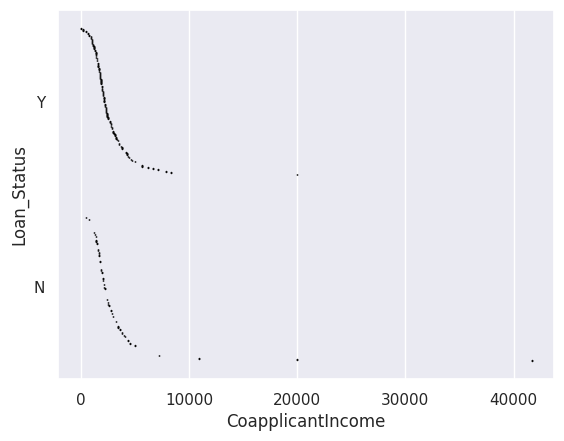

In [38]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket", hue="CoapplicantIncome", legend=False);

👉 It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

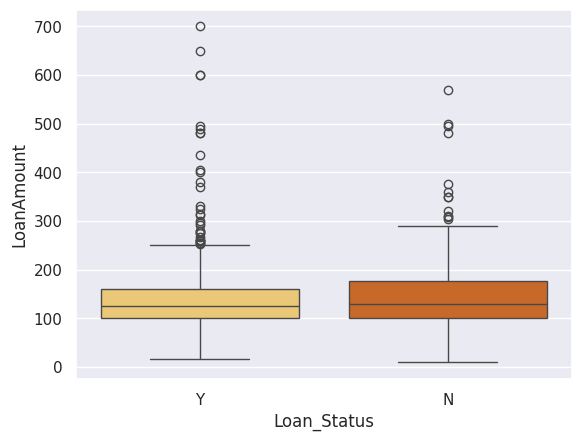

In [39]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr", hue="Loan_Status", legend=False);

👉 As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

### 4.3.4 Numerical 📈 - Numerical 📈

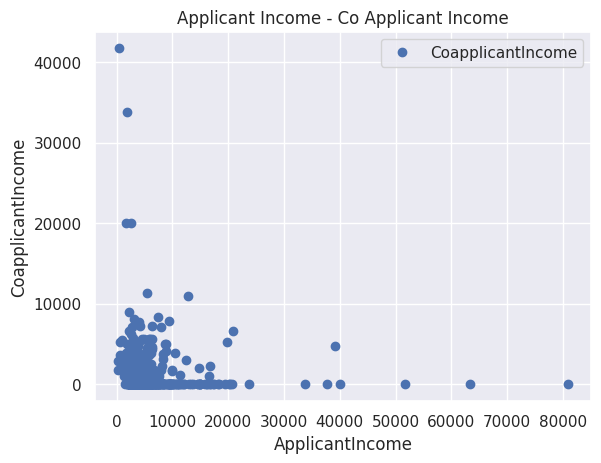

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [40]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

*   There is **negative correlation** between Applicant income and Co Applicant Income.
*   The correlation coefficient is **significant** at the 95 per cent confidence interval, as it has a **p-value of 1.46**


## 4.4 Null Values 🚫

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

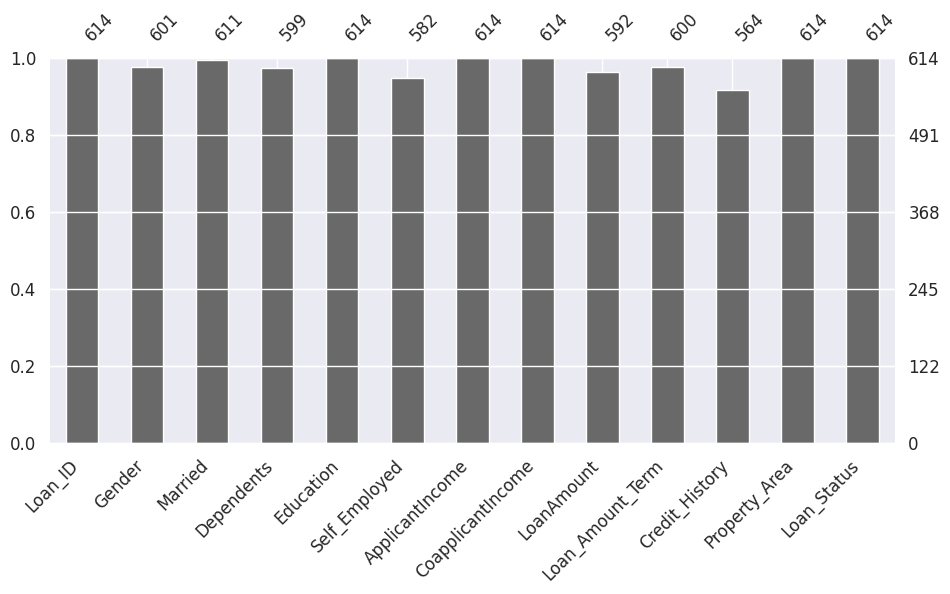

In [42]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

👉 Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored **for all variables** in the dataset.

# 5. Data Preprocessing ⚙

## 5.1 Drop Unecessary Variables 🔻
👉 Unecessary variables will be dropped in this section.

In [43]:
if 'Loan_ID' in df.columns:
    df = df.drop(['Loan_ID'], axis=1)

## 5.2 Data Imputation 📝
👉 Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

### 5.2.1 Categorical Variables 📊
👉 In this section, the imputation for categorical variables will be performed using **mode**.

In [44]:
#df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
#df['Married'].fillna(df['Married'].mode()[0],inplace=True)
#df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
#df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
#df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
#df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
# Fill missing values with mode for specified columns
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

### 5.2.2 Numerical Variables 📈
👉 The next section is imputation for numerical variables using **mean**.

In [45]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
# Fill missing values in 'LoanAmount' with the mean value
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

## 5.3 One-hot Encoding 🔧
👉 In this section, I will **transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.**

In [46]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

## 5.3 Remove Outliers & Infinite values 🚮
👉 Since there are outliers, **the outliers will be removed**. <br>


In [47]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

## 5.4 Skewed Distribution Treatment 📐
👉 In previous section, it already shown that **distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed**. <br>
👉 I will use **square root transformation** to normalized the distribution.

In [48]:
# Apply square root transformation using .loc to avoid SettingWithCopyWarning
df.loc[:, 'ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df.loc[:, 'CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df.loc[:, 'LoanAmount'] = np.sqrt(df['LoanAmount'])

/tmp/ipykernel_2428/2914391335.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 76.47875522  67.69785816  54.77225575  50.82322304  77.45966692
  48.3011387   63.29296959  56.56854249  50.          43.0464865
  70.3562364   69.90708119  50.99019514  60.9672043   97.77525249
  52.90557627  65.00769185  37.97367509  61.23724357  64.54455825
  56.27610505  68.49817516  59.16079783  47.69696007  60.55575943
  61.22091146  60.          42.42640687  48.98979486  62.77738446
  68.52007005  58.39520528  75.1598297   76.29547824  63.2455532
  43.9089968   55.55177765  65.03845017  67.94115101  52.03844733
  46.17358552  58.01723882  89.88882022  57.93962375  50.
  55.03635162  75.67033765  56.63920903  43.30127019  72.56721023
  61.23724357  31.6227766   57.7321401   62.01612693  48.93873721
  37.12142239  48.64154603  57.7321401   50.          92.5526877
  75.46522378  54.38749856  57.21013896  64.28841264  82.3528991

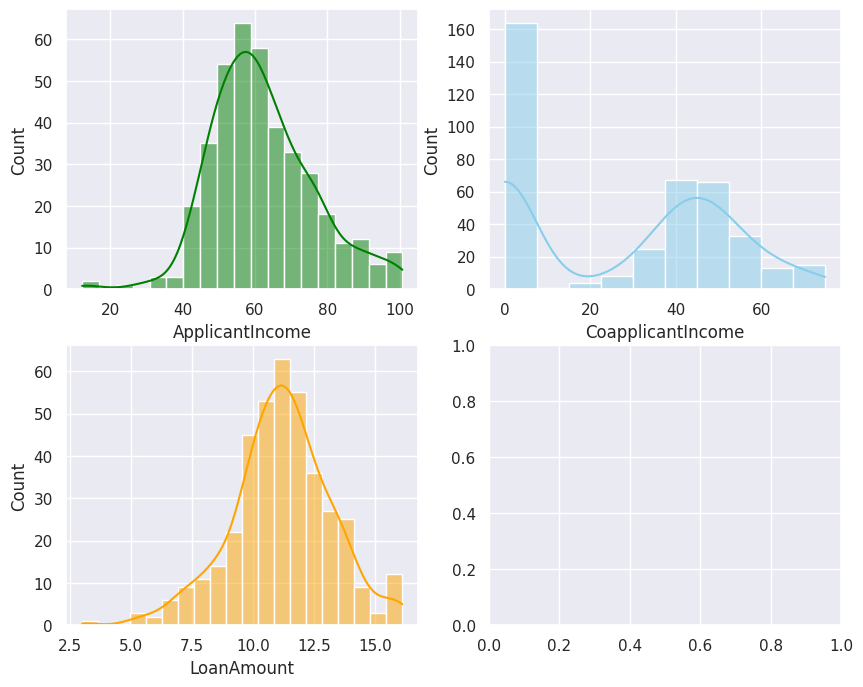

In [49]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

👉 As can be seen, the distribution after using log transformation are much better compared to original distribution.

## 5.5 Features Separating ➗
👉 Dependent features (Loan_Status) will be seperated from independent features.

In [50]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

## 5.6 SMOTE Technique 🔨
👉 In previous exploration, it can be seen that **the number between approved and rejected loan is imbalanced**. In this section, **oversampling technique will be used to avoid overfitting**,

In [51]:
X, y = SMOTE().fit_resample(X, y)

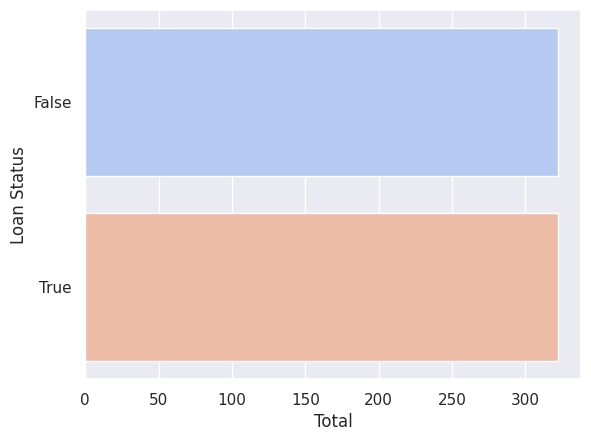

In [52]:
# Set the theme
sns.set_theme(style="darkgrid")

# Updated countplot with hue and legend set to False
sns.countplot(y=y, data=df, palette="coolwarm", hue=y, legend=False)

# Set labels
plt.ylabel('Loan Status')
plt.xlabel('Total')

# Show plot
plt.show()

👉 As can be seen, the distrubtion of Loan status are now **balanced**.

## 5.7 Data Normalization ⚖
👉 In this section, data normalization will be performed **to normalize the range of independent variables or features of data**.

In [66]:
#X = MinMaxScaler().fit_transform(X)
transformers = MinMaxScaler().fit(X)
X = transformers.transform(X)
X

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## 5.8 Splitting Data Set 🪓
👉 The data set will be split into **80% train and 20% test**.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 6. Models 🛠

## 6.1 Logistic Regression

In [55]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.89      0.75      0.81        67
        True       0.77      0.90      0.83        62

    accuracy                           0.82       129
   macro avg       0.83      0.82      0.82       129
weighted avg       0.83      0.82      0.82       129

[[50 17]
 [ 6 56]]
LR accuracy: 82.17%


In [56]:
# convert the model to onnx 
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx
from sklearn.linear_model import LogisticRegression

# Assuming LRclassifier is your trained LogisticRegression model
# and X_train is your training data

# Define the initial type for the model
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]

# Convert the model
onnx_model = convert_sklearn(LRclassifier, initial_types=initial_type)

# Save the ONNX model to a file
with open("../models/LRclassifierLoanPrediction_1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [57]:
df.iloc[1]

ApplicantIncome            67.697858
CoapplicantIncome          38.832976
LoanAmount                 11.313708
Loan_Amount_Term               360.0
Credit_History                   1.0
Gender                          True
Married                         True
Dependents_0                   False
Dependents_1                    True
Dependents_2                   False
Dependents_3+                  False
Education                       True
Self_Employed                  False
Property_Area_Rural             True
Property_Area_Semiurban        False
Property_Area_Urban            False
Loan_Status                    False
Name: 1, dtype: object

In [58]:
!pip install onnxruntime

import onnx
import onnxruntime as ort
import numpy as np

# Load the ONNX model
model_path = "../models/LRclassifierLoanPrediction.onnx"
onnx_model = onnx.load(model_path)
onnx.checker.check_model(onnx_model)

# Create an inference session
ort_session = ort.InferenceSession(model_path)

# Prepare the input data
# Assuming X_test is your test data
# Convert X_test to the appropriate format (numpy array) and type (float32)
input_name = ort_session.get_inputs()[0].name
X_test = X_test.astype(np.float32)
# Run the model
outputs = ort_session.run(None, {input_name: X_test})

# Retrieve and process the output
output_name = ort_session.get_outputs()[0].name
predictions = outputs[0]

print("Predictions:", predictions)


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Predictions: [0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1]


In [69]:
type(X)

numpy.ndarray

In [70]:
# test refused loan
data = {
    "ApplicantIncome": 341276.478755,
    "CoapplicantIncome": 0.0,
    "LoanAmount": 12.100089,
    "Loan_Amount_Term": 360.0,
    "Credit_History": 1.0,
    "Gender": True,
    "Married": False,
    "Dependents_0": True,
    "Dependents_1": False,
    "Dependents_2": False,
    "Dependents_3+": False,
    "Education": True,
    "Self_Employed": False,
    "Property_Area_Rural": False,
    "Property_Area_Semiurban": False,
    "Property_Area_Urban": True
}
data = np.array(data)
data = transformers.transform(data)






 # Convert the JSON data to a NumPy array
input_data = np.array([
    data["ApplicantIncome"],
    data["CoapplicantIncome"],
    data["LoanAmount"],
    data["Loan_Amount_Term"],
    data["Credit_History"],
    data["Gender"],
    data["Married"],
    data["Dependents_0"],
    data["Dependents_1"],
    data["Dependents_2"],
    data["Dependents_3+"],
    data["Education"],
    data["Self_Employed"],
    data["Property_Area_Rural"],
    data["Property_Area_Semiurban"],
    data["Property_Area_Urban"]
    ], dtype=np.float32).reshape(1, -1)  # Reshape to match the model's expected input shape

outputs = ort_session.run(None, {input_name: input_data})
# Retrieve and process the output
output_name = ort_session.get_outputs()[0].name
predictions = outputs[0]

print("Predictions:", predictions)

/opt/app-root/lib64/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


TypeError: float() argument must be a string or a number, not 'dict'

In [64]:
input_data

array([[3.8584841e+03, 0.0000000e+00, 6.9336569e-01, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [ ]:
# function to connect to s3 bucket
import boto3
from boto3 import session
import os

def init_s3_connection():
    global bucket_name
    key_id = os.environ.get("AWS_ACCESS_KEY_ID")
    secret_key = os.environ.get("AWS_SECRET_ACCESS_KEY")
    bucket_name = os.environ.get("AWS_S3_BUCKET")
    #endpoint = os.environ.get("rook-ceph-rgw-ocs-storagecluster-cephobjectstore.openshift-storage.svc", "rook-ceph-rgw-ocs-storagecluster-cephobjectstore.openshift-storage.svc")
    endpoint="rook-ceph-rgw-ocs-storagecluster-cephobjectstore.openshift-storage.svc:80"
    s3_client = boto3.client("s3", aws_access_key_id=key_id, aws_secret_access_key=secret_key, endpoint_url=endpoint)
    return s3_client

In [ ]:
# connect to the s3
s3_con = init_s3_connection()

In [ ]:
# push the file
obj = "/opt/app-root/src/loan-prediction/models/LRclassifierLoanPrediction.onnx"
s3_path = "models/LRclassifierLoanPrediction.onnx"
s3_con.upload_file(obj, bucket_name, s3_path)

## 6.2 K-Nearest Neighbour (KNN)

In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 6.3 Support Vector Machine (SVM)

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

## 6.4 Naive Bayes

### 6.4.1 Categorical NB

In [ ]:
#NBclassifier1 = CategoricalNB()
#NBclassifier1.fit(X_train, y_train)

#y_pred = NBclassifier1.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))


# Initialize the encoder with handle_unknown parameter
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

# Replace unknown categories in X_test with the most frequent category from X_train
for i in range(X_test_encoded.shape[1]):
    most_frequent_category = np.argmax(np.bincount(X_train_encoded[:, i].astype(int)))
    X_test_encoded[:, i][X_test_encoded[:, i] == -1] = most_frequent_category

# Initialize and fit the CategoricalNB classifier
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train_encoded, y_train)

# Predict using the encoded test data
y_pred = NBclassifier1.predict(X_test_encoded)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))



### 6.4.2 Gaussian NB

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

## 6.5 Decision Tree

In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 6.6 Random Forest

In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## 6.7 Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

# 7. Model Comparison 👀

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

👉 In general, it can be seen that **all models can achieve up to 70% accuracy**. <br>
👉 The highest accuracy is **93%%**. <br><br>
👉 If you have any suggestions to **improve** these models, we can *discuss in the comments* :).

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*<br><br>
#### 🎈 Check out my work on GitHub using similar data sets with SAS studio [here](https://github.com/caesarmario/loan-prediction-SAS-studio).